# Milestone 2

## Data Analysis and Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("preprocessed_stroke_data.csv")

In [5]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,False,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,True,False,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,True,False
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,True,False,False


### 1. Data Cleaning

In [7]:
df.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
stroke                         0
gender_Male                    0
gender_Other                   0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
Residence_type_Urban           0
smoking_status_never smoked    0
smoking_status_smokes          0
smoking_status_unknown         0
dtype: int64

### 2. Data Analysis

In [9]:
df1 = pd.read_csv(r"C:\Users\start\Downloads\healthcare_stroke_dataset.csv")

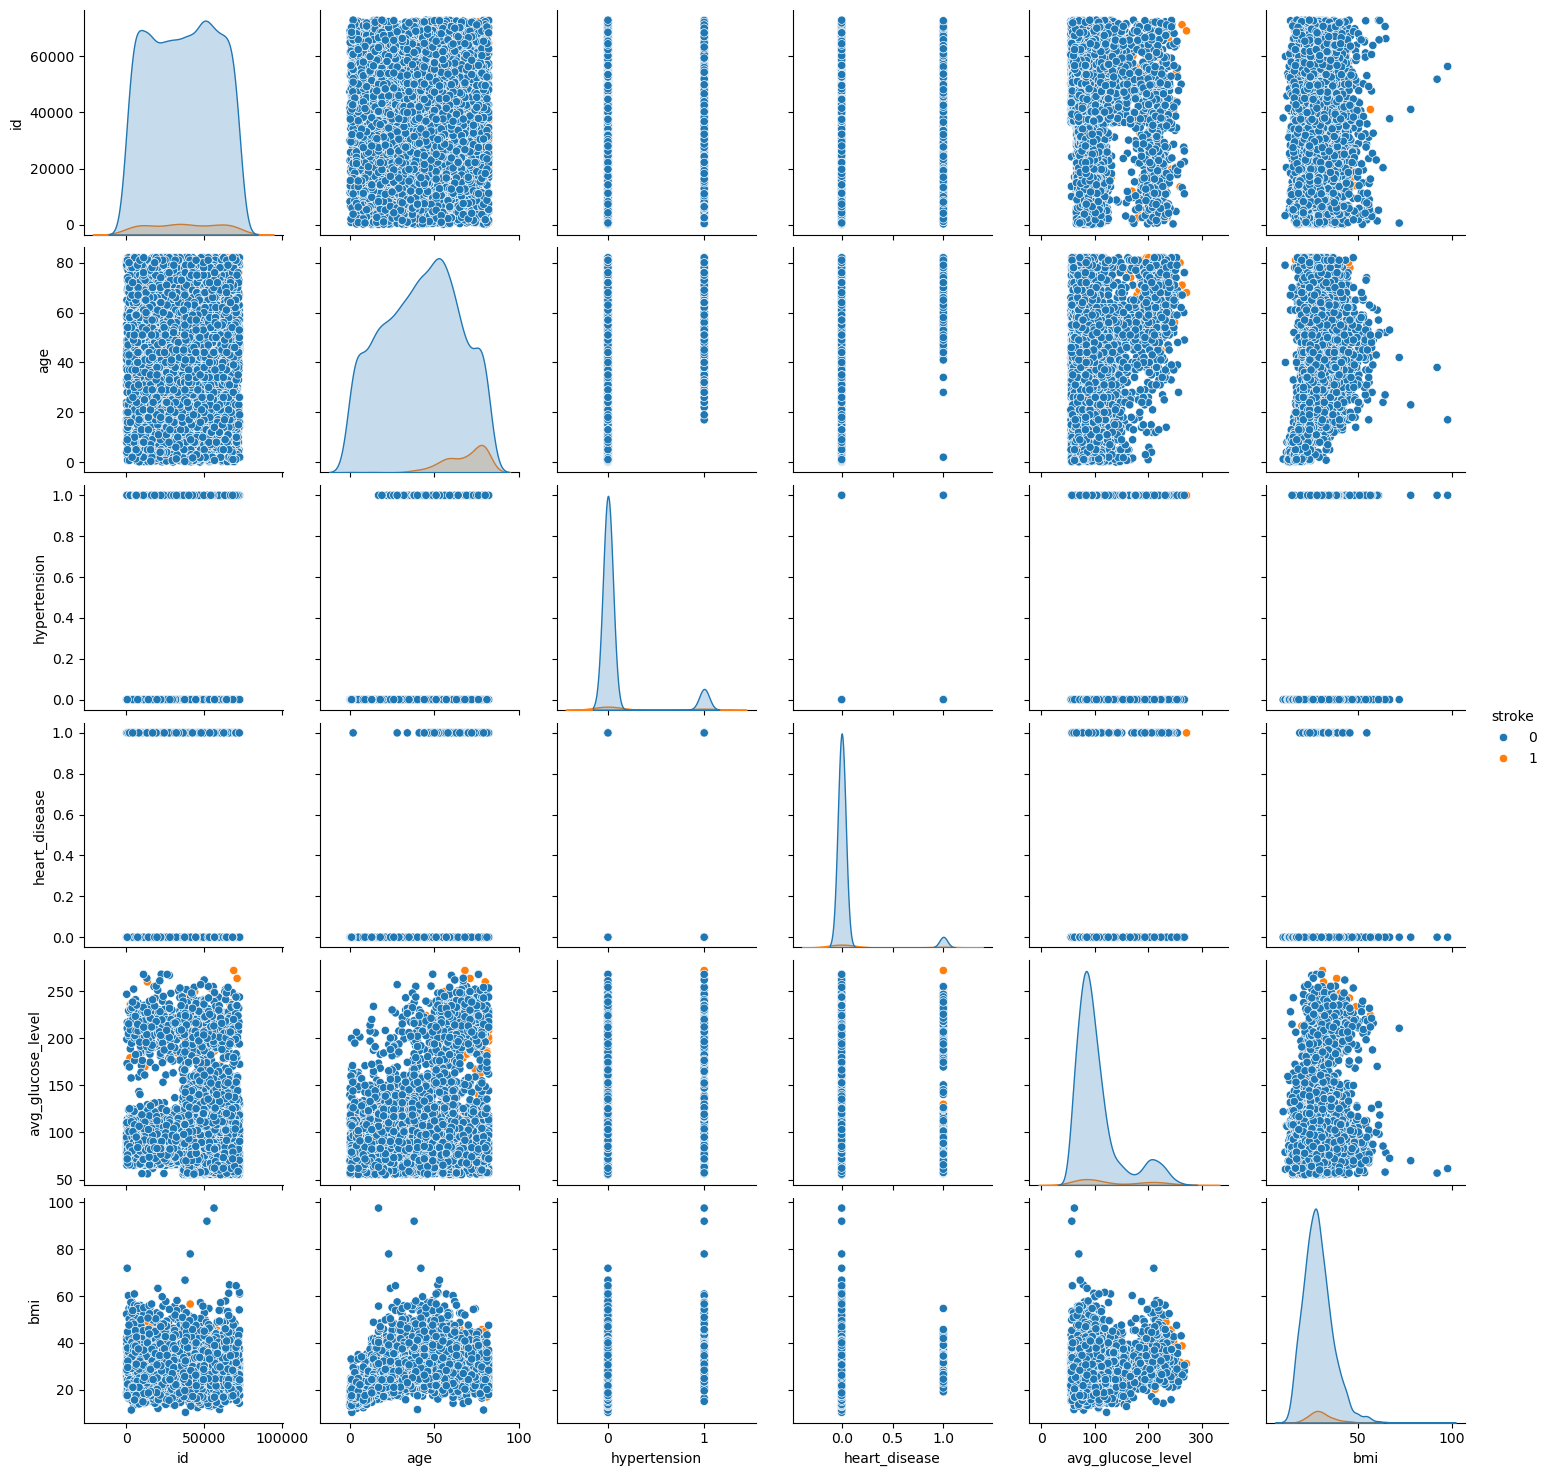

In [10]:
sns.pairplot(df1, hue='stroke')
plt.show()

In [11]:
from scipy.stats import ttest_ind
stroke_group = df[df['stroke'] == 1]['age']
non_stroke_group = df[df['stroke'] == 0]['age']

t_stat, p_val = ttest_ind(stroke_group, non_stroke_group)
print(f"T-test for Age: t={t_stat:.3f}, p={p_val:.3f}")

T-test for Age: t=18.081, p=0.000


In [12]:
from scipy.stats import ttest_ind
stroke_group = df[df['stroke'] == 1]['age']
non_stroke_group = df[df['stroke'] == 0]['age']

t_stat, p_val = ttest_ind(stroke_group, non_stroke_group)
print(f"T-test for Age: t={t_stat:.3f}, p={p_val:.3f}")

T-test for Age: t=18.081, p=0.000


In [13]:
stroke_group = df[df['stroke'] == 1]['avg_glucose_level']
non_stroke_group = df[df['stroke'] == 0]['avg_glucose_level']

t_stat, p_val = ttest_ind(stroke_group, non_stroke_group)
print(f"T-test for Average Glocuse Level: t={t_stat:.3f}, p={p_val:.3f}")

T-test for Average Glocuse Level: t=9.513, p=0.000


In [14]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['gender_Male'], df['stroke'])
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-square test for Gender: chi2={chi2:.3f}, p={p:.3f}")

Chi-square test for Gender: chi2=0.343, p=0.558


In [15]:
import statsmodels.api as sm
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
X = sm.add_constant(X)
y = df['stroke']
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155720
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5104
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 May 2025   Pseudo R-squ.:                  0.2004
Time:                        02:32:49   Log-Likelihood:                -795.73
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 5.074e-84
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.4665      0.504    -14.815      0.000      -8.454      -6.479
age     

### 3. Data Visualization:

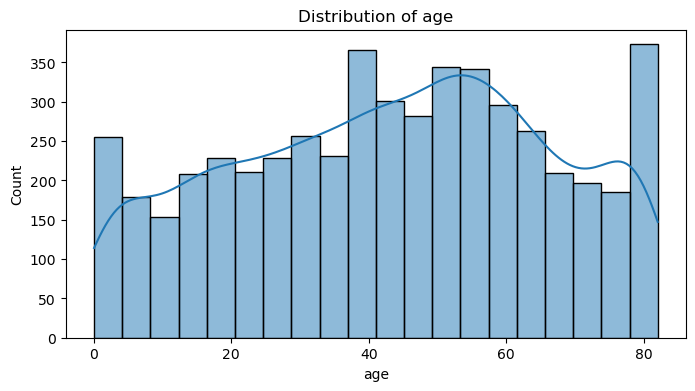

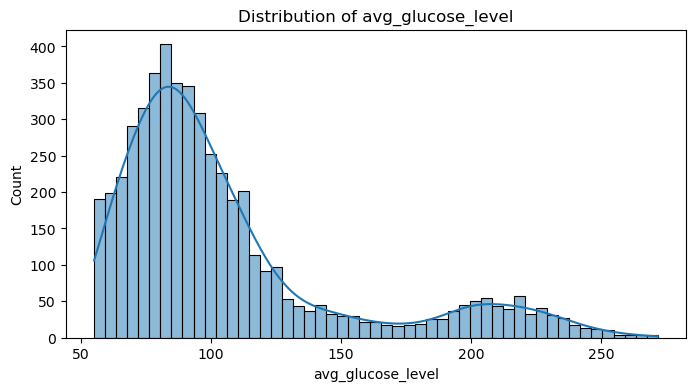

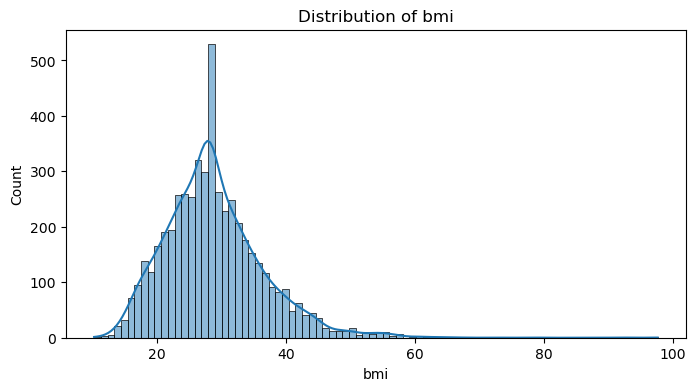

In [17]:
# Distribution plots for numeric features
num_cols = ['age', 'avg_glucose_level', 'bmi']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

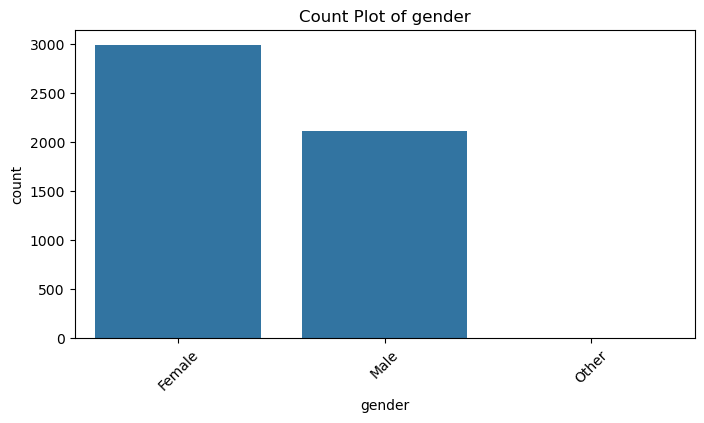

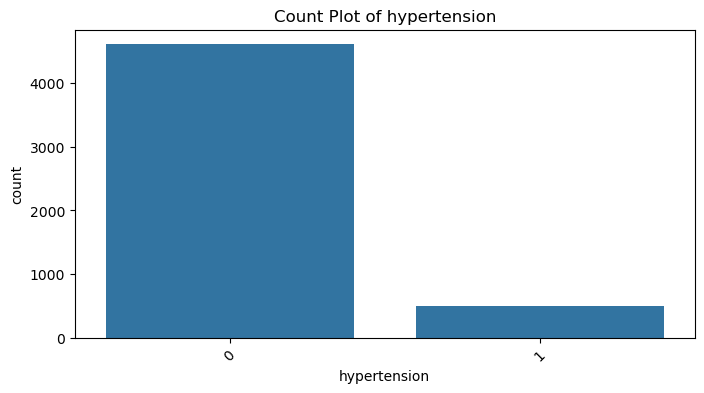

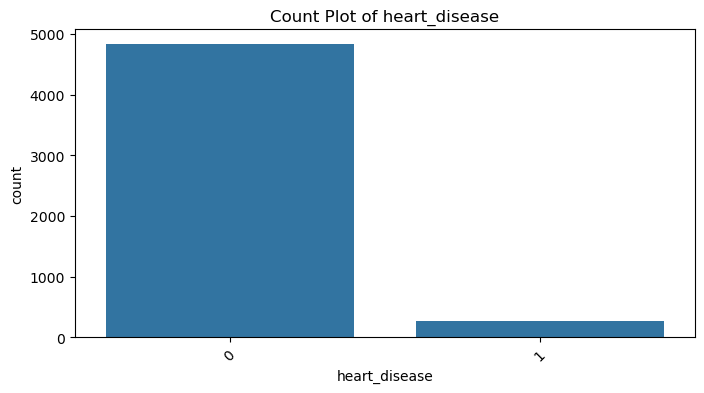

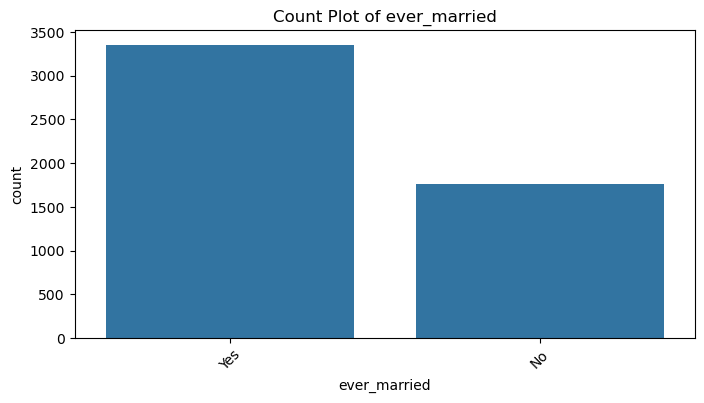

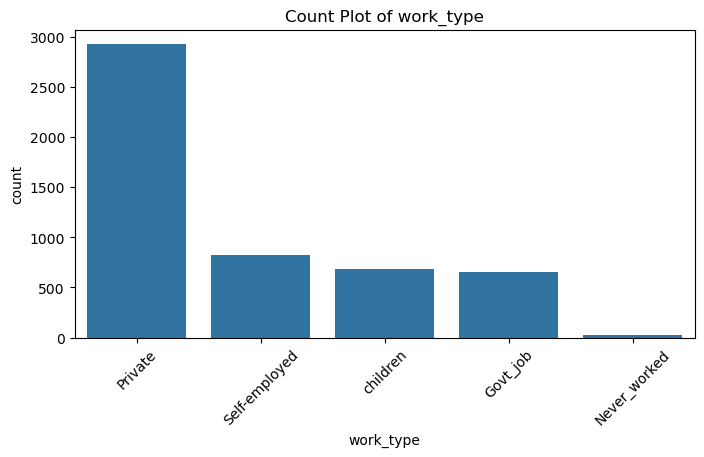

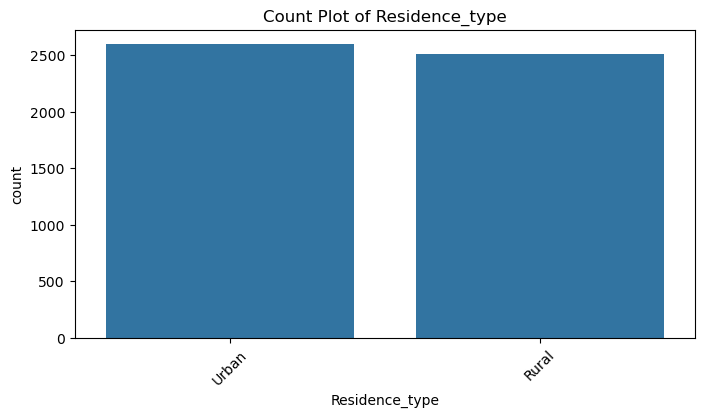

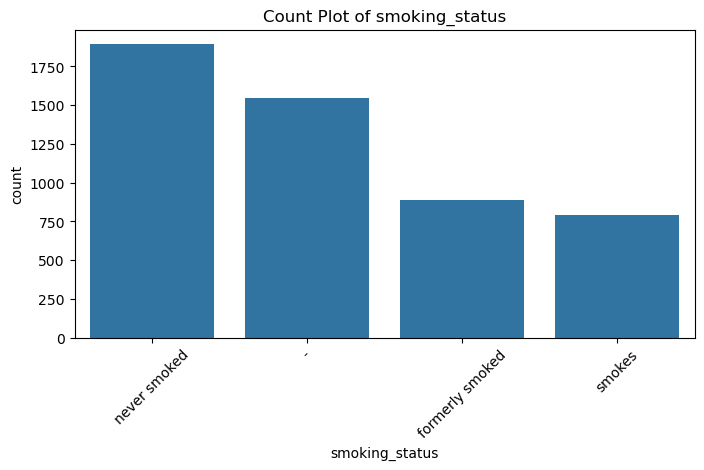

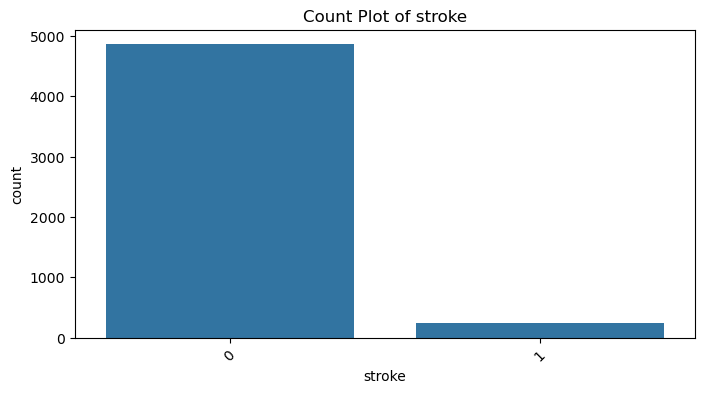

In [18]:
# Count plots for categorical features
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'smoking_status', 'stroke']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df1, x=col, order=df1[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

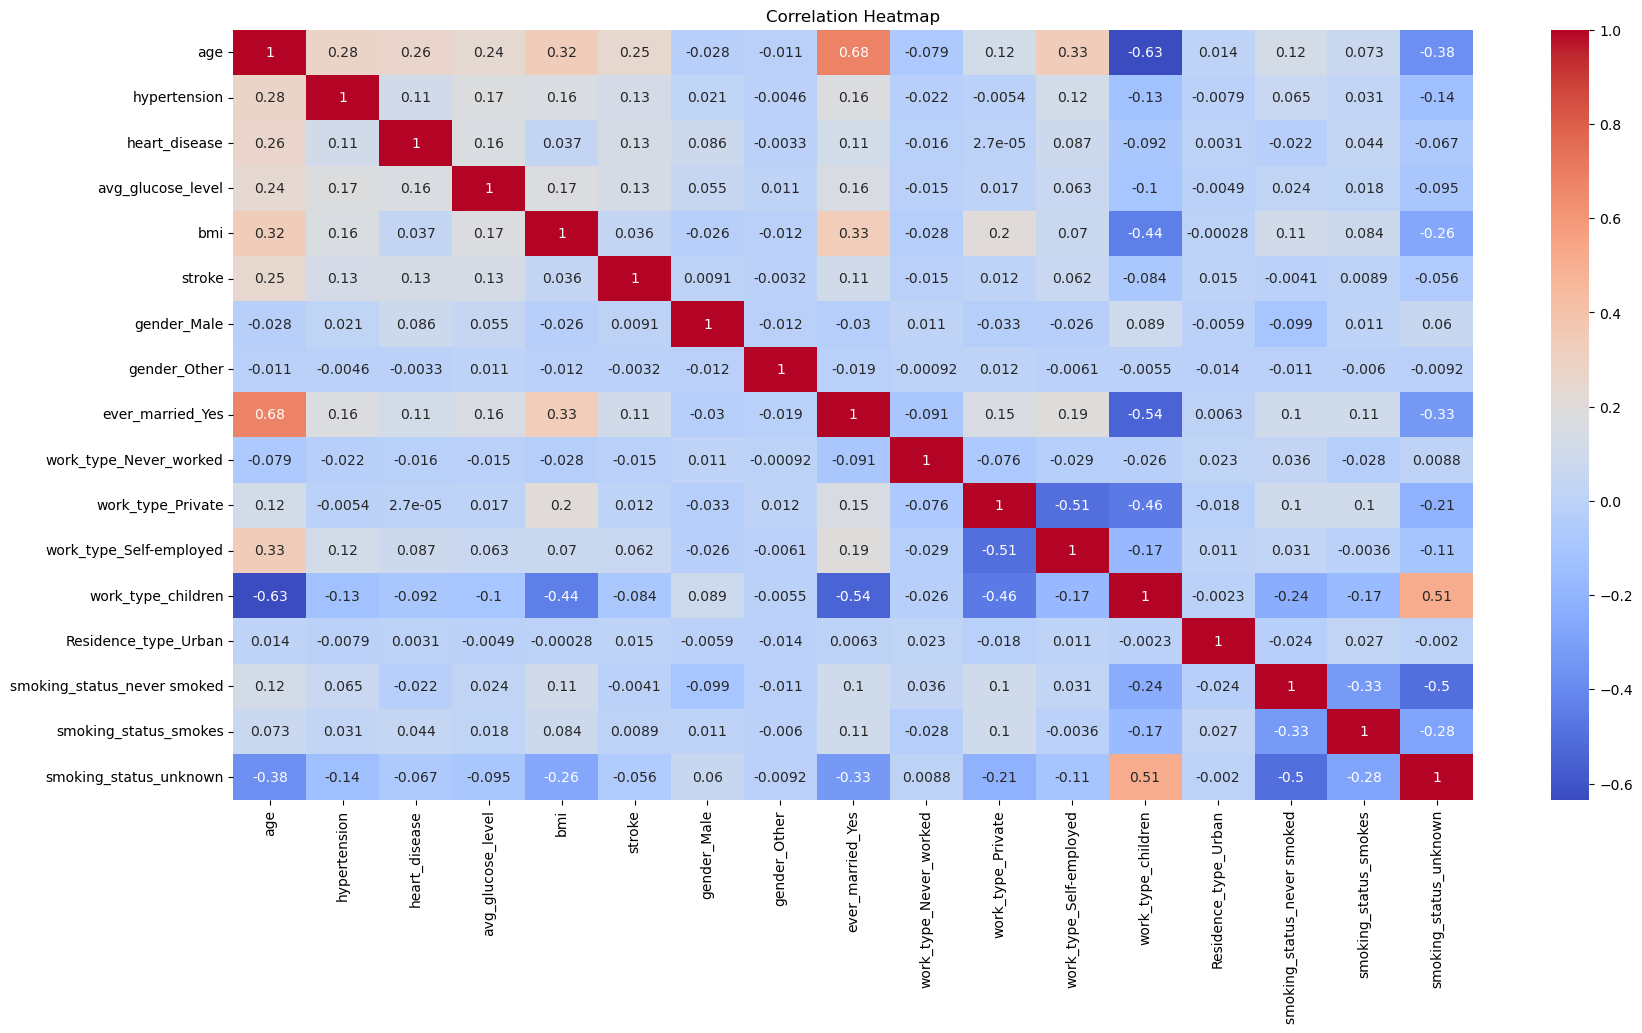

In [23]:
# Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

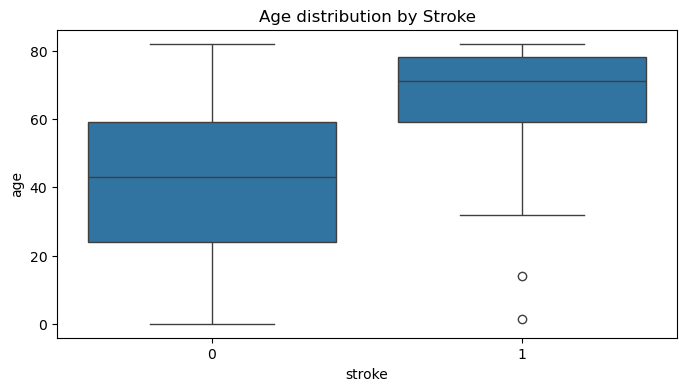

In [25]:
# Bivariate Analysis: Age vs Stroke
plt.figure(figsize=(8,4))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age distribution by Stroke')
plt.show()

In [27]:
import dash
from dash import dcc, html
import plotly.express as px

In [28]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'smoking_status_unknown'],
      dtype='object')

In [29]:
app = dash.Dash(__name__)

# Create a bar chart for Stroke vs. Hypertension
fig1 = px.bar(df1, x='gender', y='age', color='stroke', title="Stroke vs Age by Gender")

# Create a pie chart for Stroke distribution
fig2 = px.pie(df1, names='stroke', title="Stroke Distribution", hole=0.3)

# Create a scatter plot for Hypertension vs Age
fig3 = px.scatter(df1, x='age', y='hypertension', color='stroke', title="Hypertension vs Age")

# Layout of the app
app.layout = html.Div([
    html.H1("Healthcare Stroke Analysis Dashboard"),
    
    # Graph for Stroke vs Age by Gender
    html.Div([dcc.Graph(figure=fig1)]),
    
    # Graph for Stroke Distribution
    html.Div([dcc.Graph(figure=fig2)]),
    
    # Graph for Hypertension vs Age
    html.Div([dcc.Graph(figure=fig3)]),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)